In [4]:
# Import libraries 
import numpy as np # linear algebra 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv) 
import os 
import pandas as pd 
import warnings 
warnings.filterwarnings("ignore") 
import seaborn as sns 
import matplotlib.pyplot as plt 
sns.set(style='white',color_codes=True)

In [5]:
df=pd.read_csv('Iris.csv') 
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
df.describe() 


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [10]:
df.isnull().sum() 


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [11]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

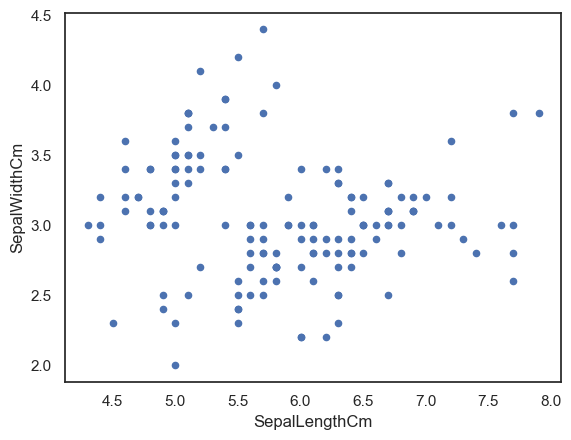

In [16]:
df.plot(kind='scatter',x="SepalLengthCm", y="SepalWidthCm") 


<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

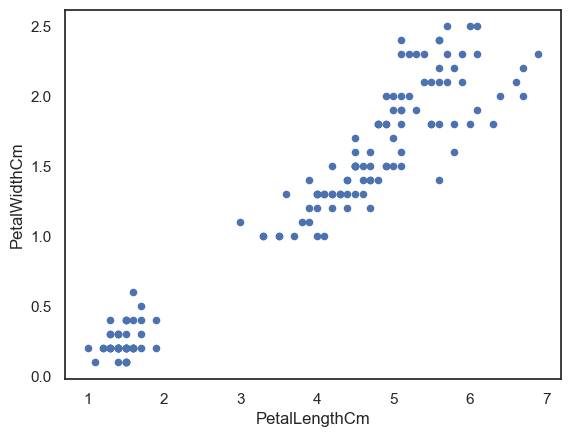

In [17]:
df.plot(kind='scatter',x="PetalLengthCm", y="PetalWidthCm")

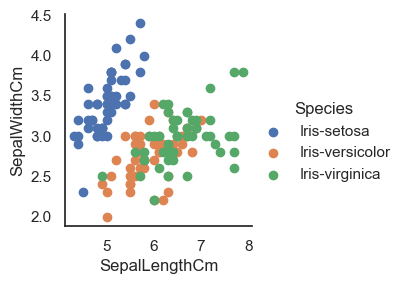

In [22]:
sns.FacetGrid(df,hue="Species").map(plt.scatter,"SepalLengthCm","SepalWidthCm").add_legend()

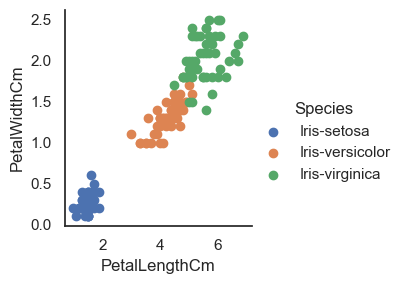

In [23]:
sns.FacetGrid(df,hue="Species").map(plt.scatter,"PetalLengthCm","PetalWidthCm").add_legend()

<Axes: xlabel='Species', ylabel='PetalLengthCm'>

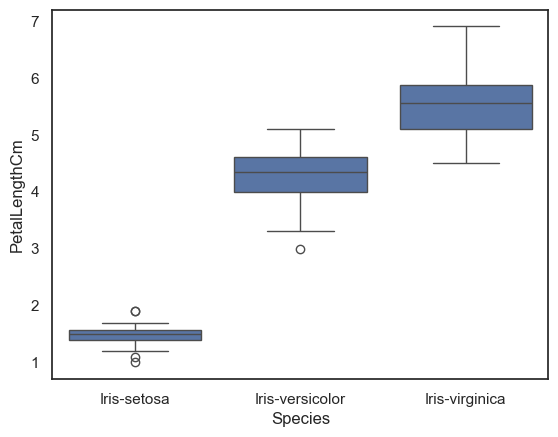

In [24]:
sns.boxplot(x="Species", y="PetalLengthCm", data=df)

<Axes: xlabel='Species', ylabel='PetalWidthCm'>

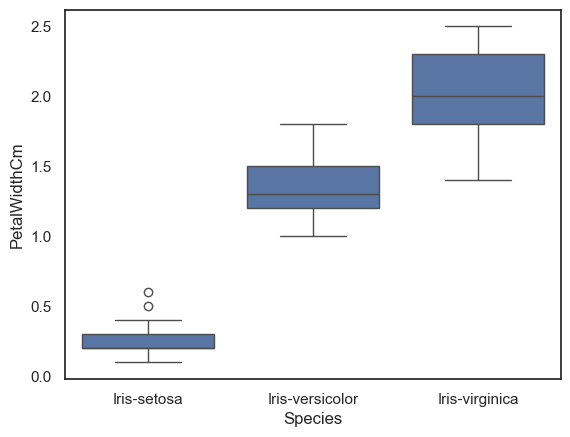

In [25]:
sns.boxplot(x="Species", y="PetalWidthCm", data=df) 

<Axes: xlabel='Species', ylabel='PetalLengthCm'>

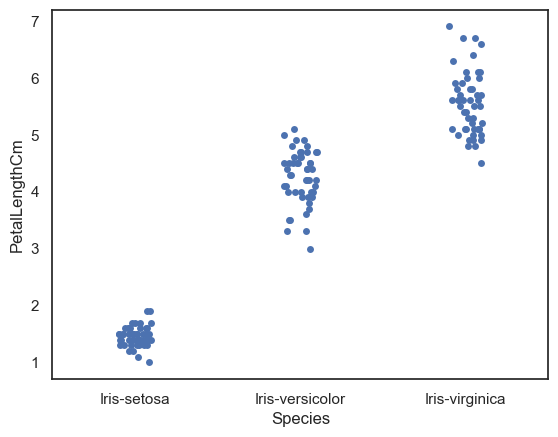

In [26]:
sns.stripplot(x="Species", y="PetalLengthCm", data=df, jitter=True, edgecolor="gray")

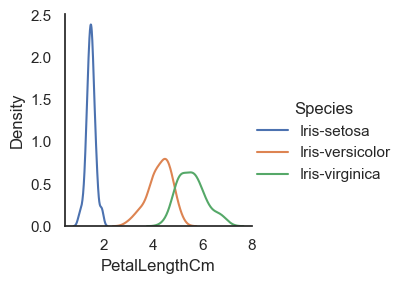

In [28]:
# Distribution density plot KDE (kernel density estimate) 
sns.FacetGrid(df,hue="Species").map(sns.kdeplot, "PetalLengthCm").add_legend()

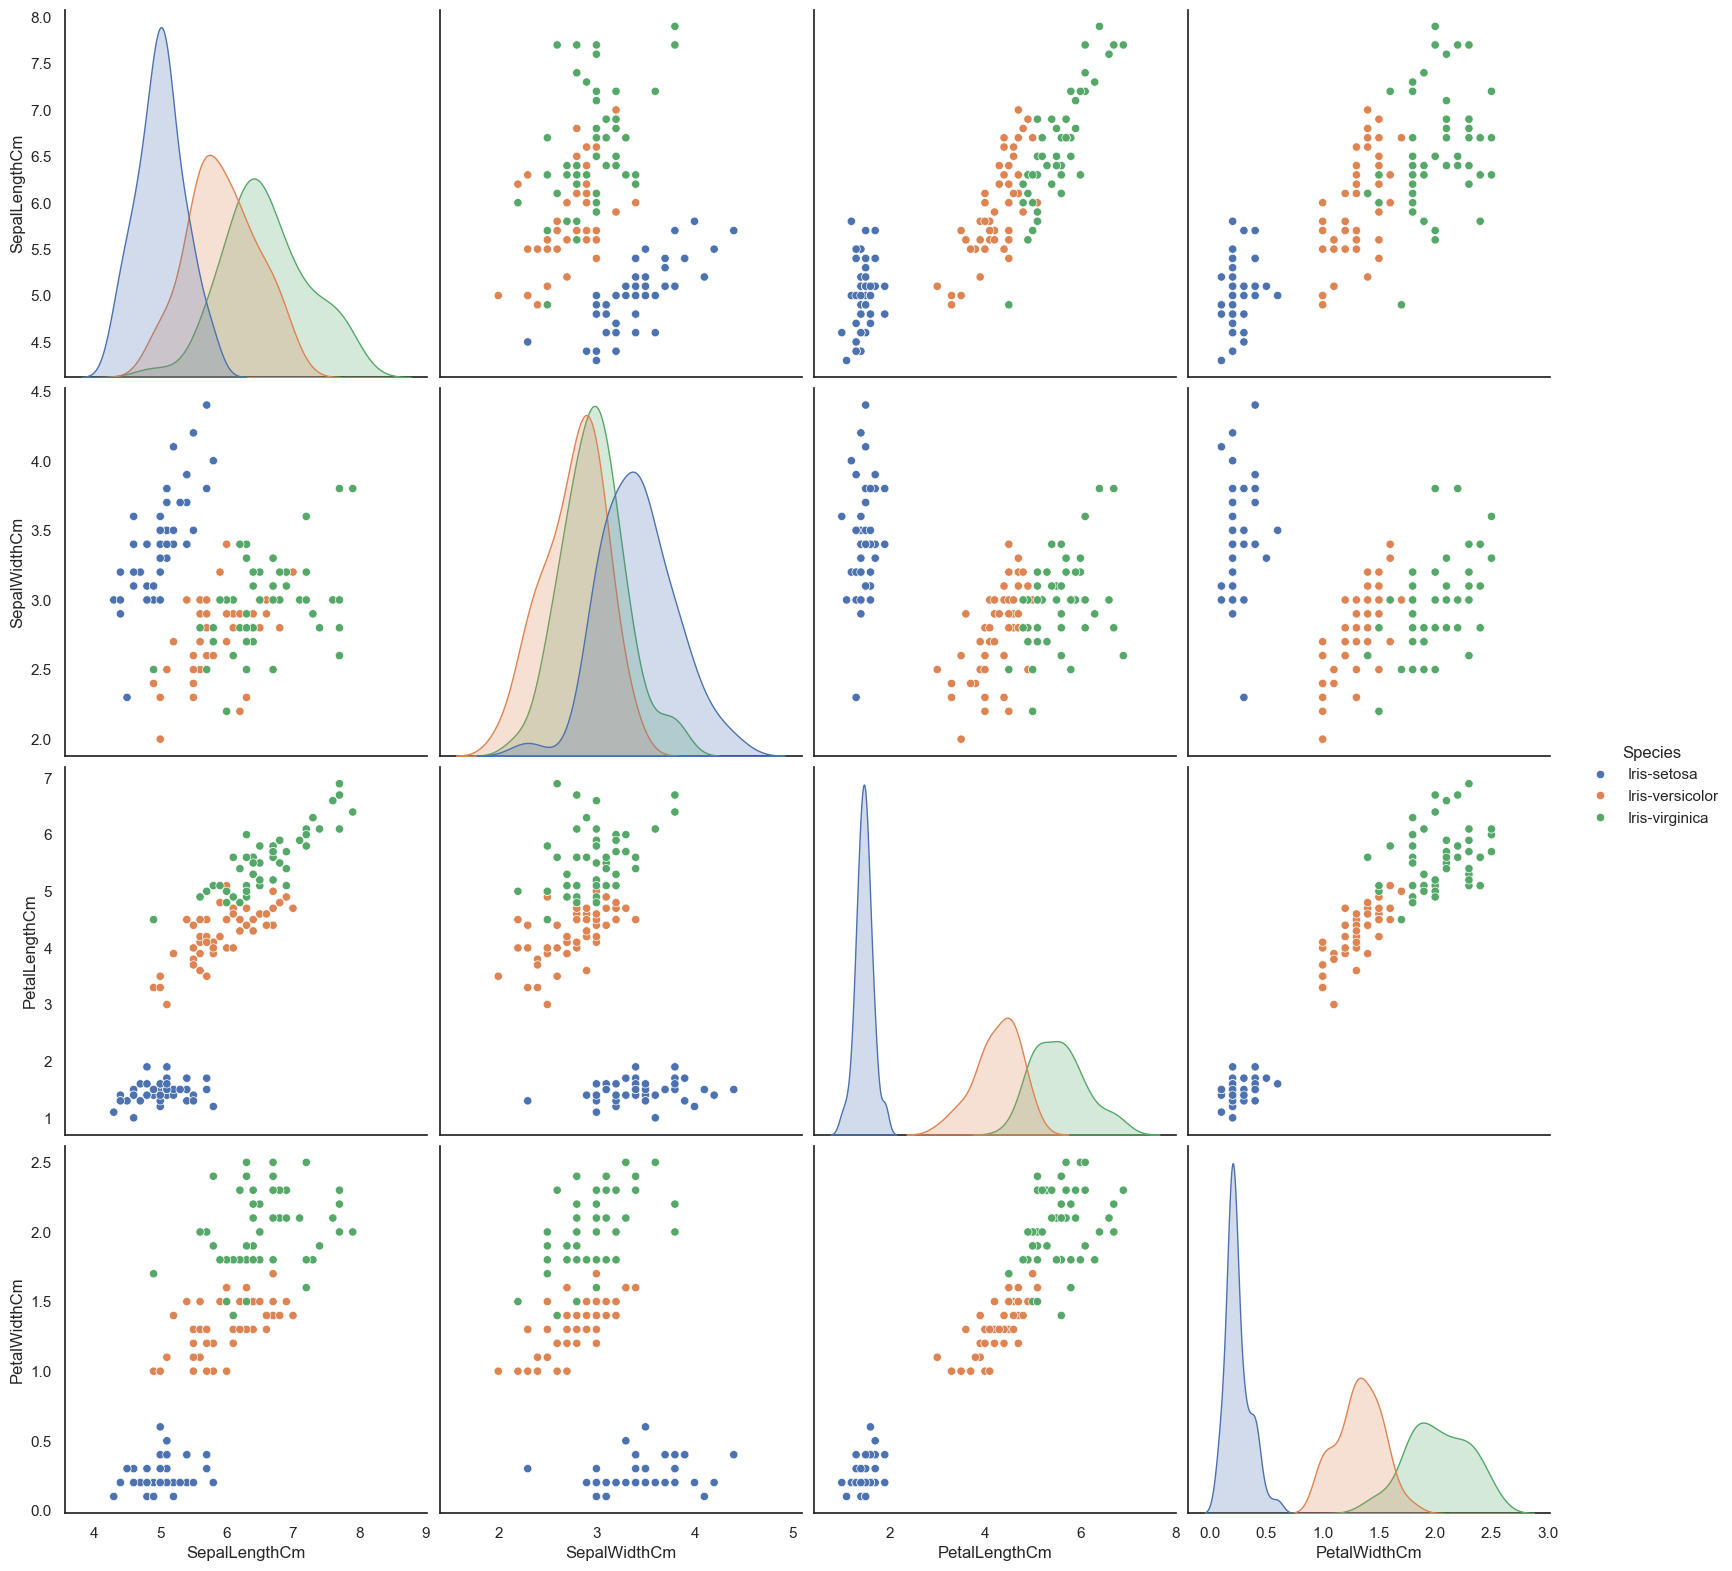

In [29]:
sns.pairplot(df.drop("Id", axis=1), hue="Species", size=4)

In [30]:
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics

In [31]:
train, test = train_test_split(df, test_size = 0.25,random_state=20)
print(train.shape) 
print(test.shape)

(112, 6)
(38, 6)


In [33]:
train_X=train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] 
train_y=train.Species 
test_X=test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] 
test_y=test.Species 
train_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
51,6.4,3.2,4.5,1.5
130,7.4,2.8,6.1,1.9
55,5.7,2.8,4.5,1.3
134,6.1,2.6,5.6,1.4
37,4.9,3.1,1.5,0.1


In [34]:
KNN=KNeighborsClassifier(n_neighbors=3) 
KNN.fit(train_X,train_y) 
prediction=KNN.predict(test_X) 
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,test_y)*100, 'percent')

The accuracy of the KNN is 92.10526315789474 percent


In [35]:
KNN.score(test_X,test_y)

0.9210526315789473

In [37]:
#import confusion_matrix 
from sklearn.metrics import confusion_matrix 
prediction=KNN.predict(test_X) 
confusion_matrix(test_y,prediction)

array([[12,  0,  0],
       [ 0, 13,  1],
       [ 0,  2, 10]], dtype=int64)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.87      0.93      0.90        14
 Iris-virginica       0.91      0.83      0.87        12

       accuracy                           0.92        38
      macro avg       0.93      0.92      0.92        38
   weighted avg       0.92      0.92      0.92        38



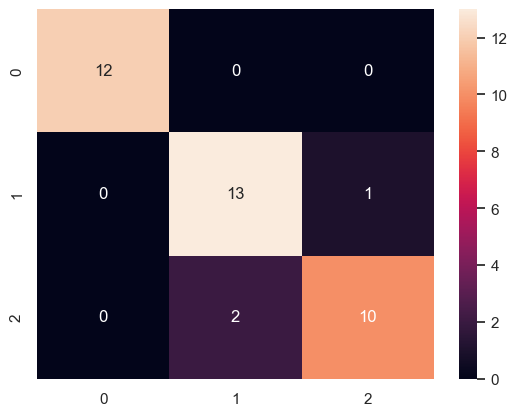

In [38]:
import seaborn as sns 
cf_matrix=confusion_matrix(test_y,prediction) 
sns.heatmap(cf_matrix, annot=True)
#import classification_report 
from sklearn.metrics import classification_report 
print(classification_report(test_y,prediction))